In [1]:
# Name : Charles Githui Muhuko.
# Reg No : SCT313-2631/2022.
# Spotify Music Recommender based on Spotify API documentation
# The dataset is a labelled data for song details and acharacteristics

In [104]:
# Import required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [96]:
df = pd.read_csv("spotify_music_data.csv")
#show first 10 rows
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.8270,140.951,224029,4,1
6,0.666,0.5890,0,-8.405,0,0.3240,0.5550,0.000000,0.1140,0.7760,74.974,146053,4,1
7,0.922,0.7120,7,-6.024,1,0.1710,0.0779,0.000040,0.1750,0.9040,104.964,161800,4,1
8,0.794,0.6590,7,-7.063,0,0.0498,0.1430,0.002240,0.0944,0.3080,112.019,247460,4,0
9,0.853,0.6680,3,-6.995,1,0.4470,0.2630,0.000000,0.1040,0.7450,157.995,165363,4,1


In [5]:
#show last 5 rows
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [6]:
#check null values count in all columns
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [7]:
#get number of rows and columns in the dataset
df.shape

(195, 14)

In [8]:
#get data type and counts of the present columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [9]:
#get data description : distribution of data in the columns
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


# Visualisation

<Figure size 1400x900 with 0 Axes>

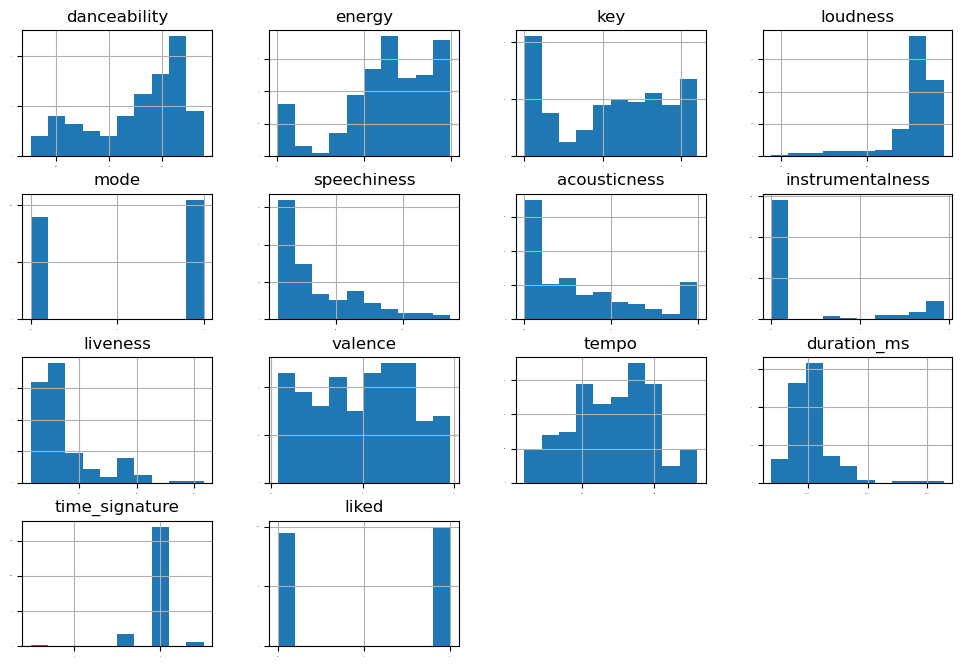

In [11]:
plt.figure(figsize=(14, 9))
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

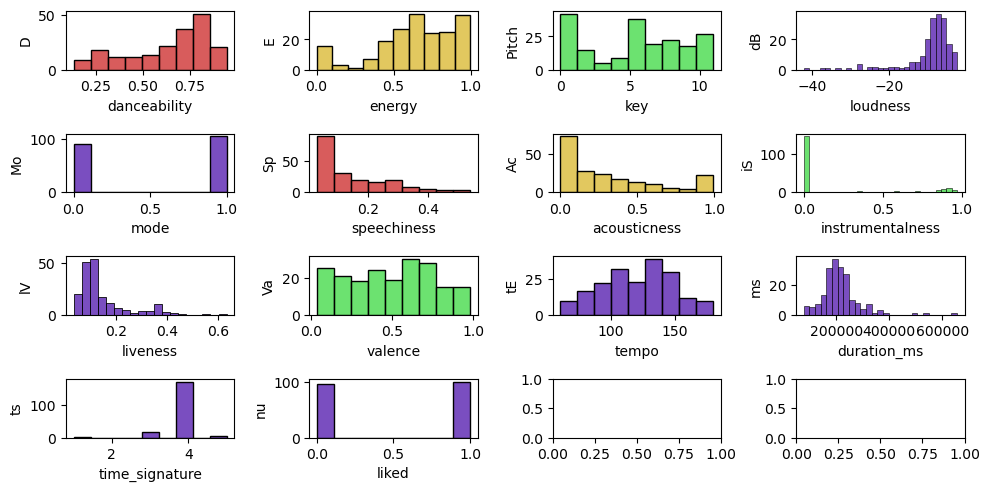

In [14]:
fig2, axs2 = plt.subplots(nrows=4, ncols=4, figsize=(10,5)) 
sns.histplot(df['danceability'], ax=axs2[0,0], color='#cc2525')
sns.histplot(df['energy'], ax=axs2[0,1], color='#d9b629')
sns.histplot(df['key'], ax=axs2[0,2], color='#3bd940')
sns.histplot(df['loudness'], ax=axs2[0,3], color='#4d13ab')
sns.histplot(df['mode'], ax=axs2[1,0], color='#4d13ab')
sns.histplot(df['speechiness'], ax=axs2[1,1], color='#cc2525')
sns.histplot(df['acousticness'], ax=axs2[1,2], color='#d9b629')
sns.histplot(df['instrumentalness'], ax=axs2[1,3], color='#3bd940')
sns.histplot(df['liveness'], ax=axs2[2,0], color='#4d13ab')
sns.histplot(df['valence'], ax=axs2[2,1], color='#3bd940')
sns.histplot(df['tempo'], ax=axs2[2,2], color='#4d13ab')
sns.histplot(df['duration_ms'], ax=axs2[2,3], color='#4d13ab')
sns.histplot(df['time_signature'], ax=axs2[3,0], color='#4d13ab')
sns.histplot(df['liked'], ax=axs2[3,1], color='#4d13ab')
axs2[0,0].set_xlabel('danceability')
axs2[0,1].set_xlabel('energy')
axs2[0,2].set_xlabel('key')
axs2[0,3].set_xlabel('loudness')
axs2[1,0].set_xlabel('mode')
axs2[1,1].set_xlabel('speechiness')
axs2[1,2].set_xlabel('acousticness')
axs2[1,3].set_xlabel('instrumentalness')
axs2[2,0].set_xlabel('liveness')
axs2[2,1].set_xlabel('valence')
axs2[2,2].set_xlabel('tempo')
axs2[2,3].set_xlabel('duration_ms')
axs2[3,0].set_xlabel('time_signature')
axs2[3,1].set_xlabel('liked')
axs2[0,0].set_ylabel('D')
axs2[0,1].set_ylabel('E')
axs2[0,2].set_ylabel('Pitch')
axs2[0,3].set_ylabel('dB')
axs2[1,0].set_ylabel('Mo')
axs2[1,1].set_ylabel('Sp')
axs2[1,2].set_ylabel('Ac')
axs2[1,3].set_ylabel('iS')
axs2[2,0].set_ylabel('lV')
axs2[2,1].set_ylabel('Va')
axs2[2,2].set_ylabel('tE')
axs2[2,3].set_ylabel('ms')
axs2[3,0].set_ylabel('ts')
axs2[3,1].set_ylabel('nu')
                     
fig2.tight_layout()
plt.show()

<Axes: xlabel='danceability', ylabel='Count'>

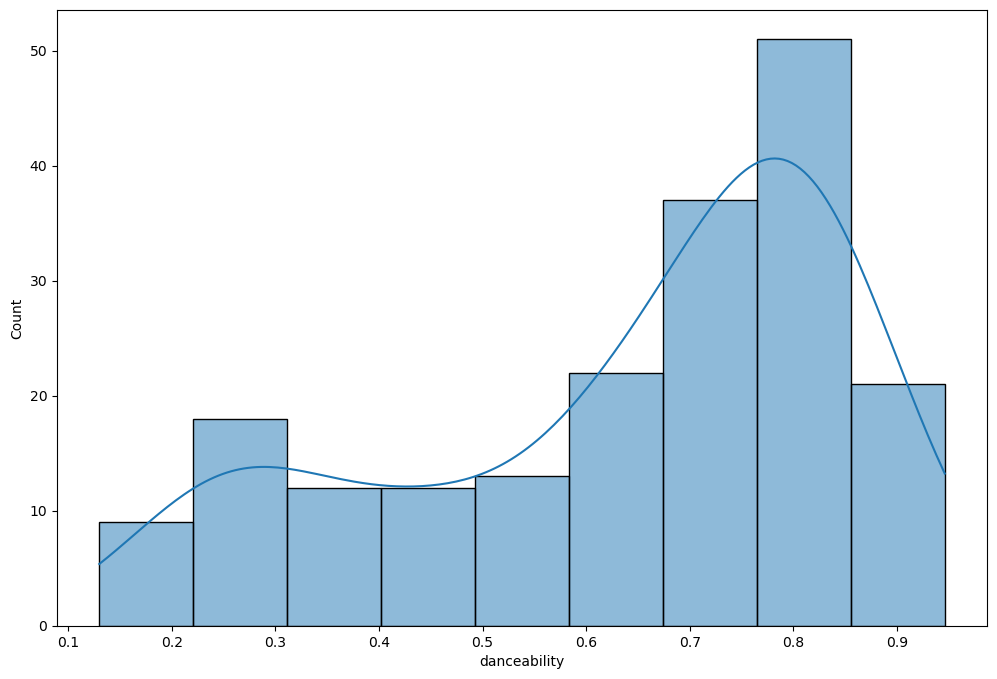

In [16]:
plt.figure(figsize=(12, 8))
sns.histplot(df.danceability, kde=True)

<Axes: xlabel='energy', ylabel='Count'>

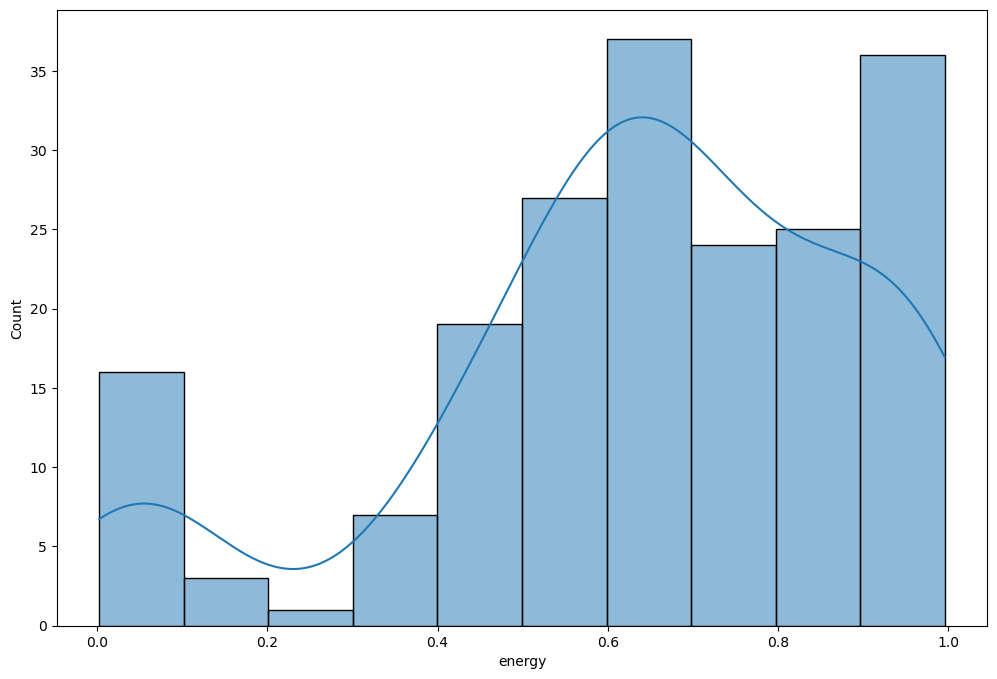

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(df.energy, kde=True)

<Axes: xlabel='key', ylabel='Count'>

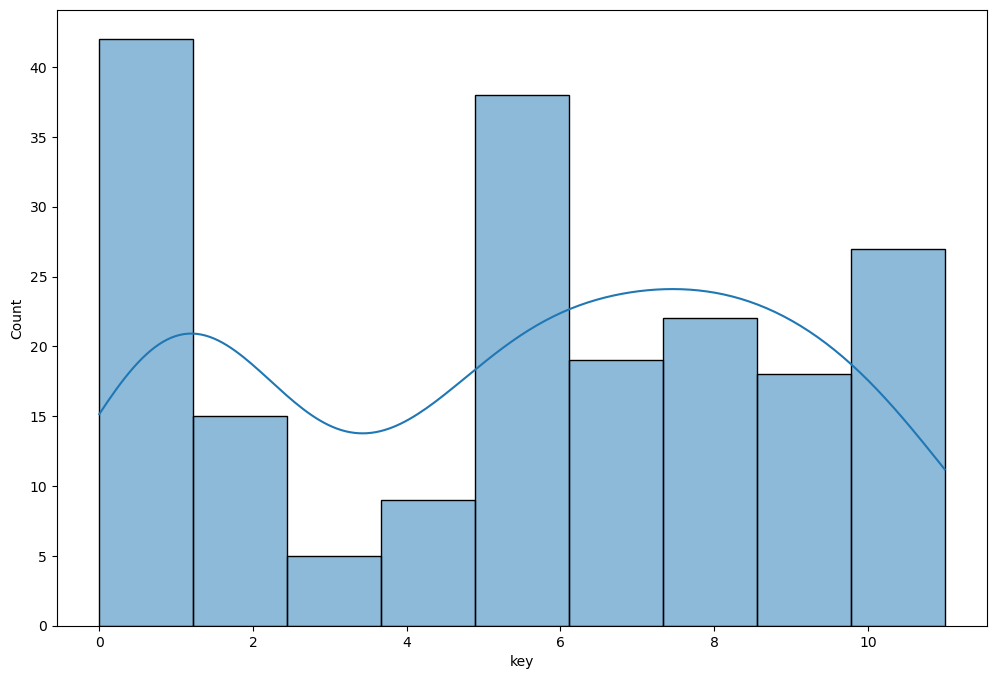

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(df.key, kde=True)

<Axes: xlabel='loudness', ylabel='Count'>

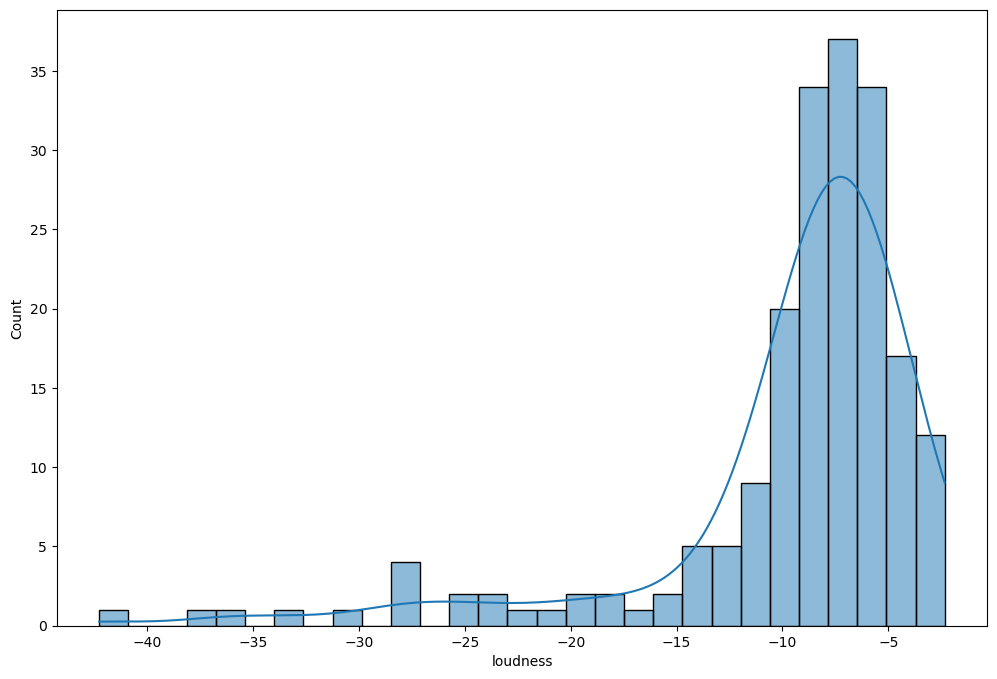

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(df.loudness, kde=True)

plt.figure(figsize=(12, 8))
sns.histplot(df.spechiness, kde=True)

<Axes: xlabel='speechiness', ylabel='Count'>

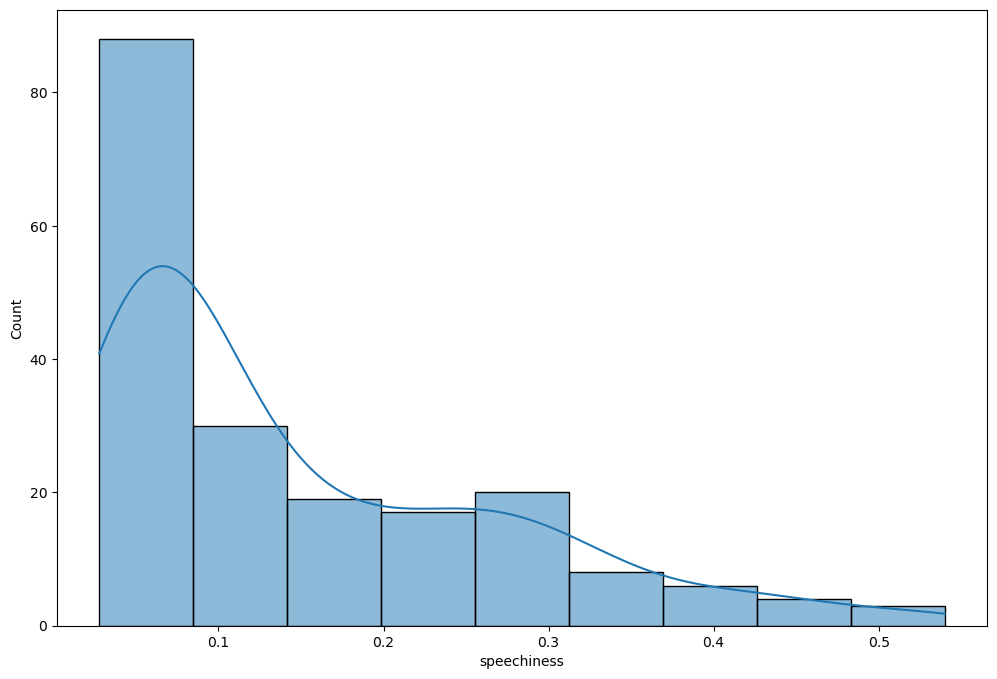

In [34]:
plt.figure(figsize=(12, 8))
sns.histplot(df.speechiness, kde=True)

<Axes: xlabel='acousticness', ylabel='Count'>

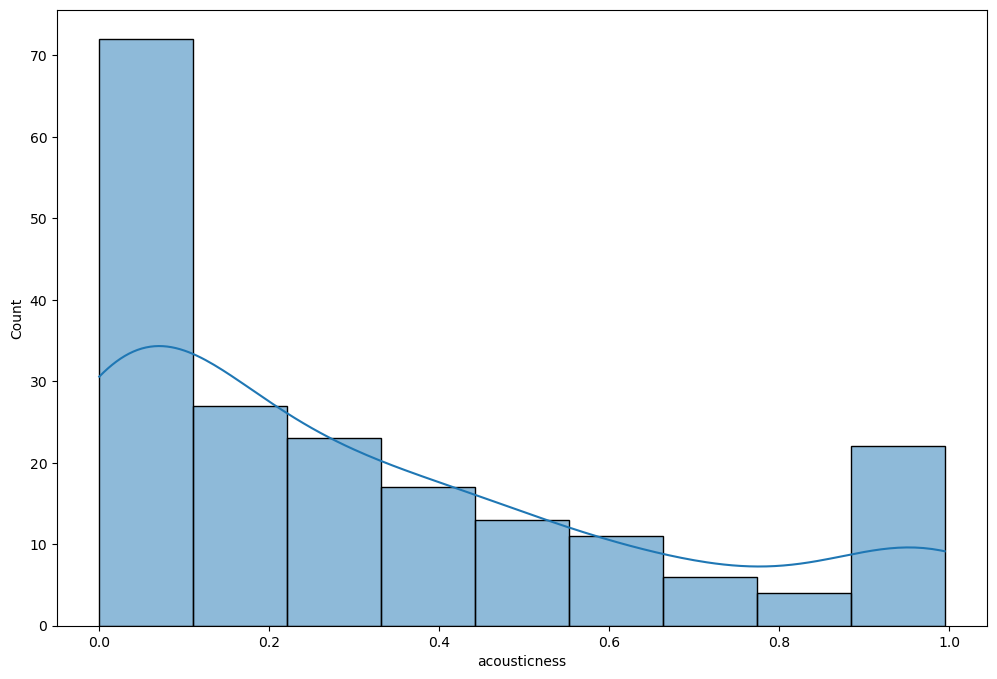

In [36]:
plt.figure(figsize=(12, 8))
sns.histplot(df.acousticness, kde=True)

<Axes: xlabel='instrumentalness', ylabel='Count'>

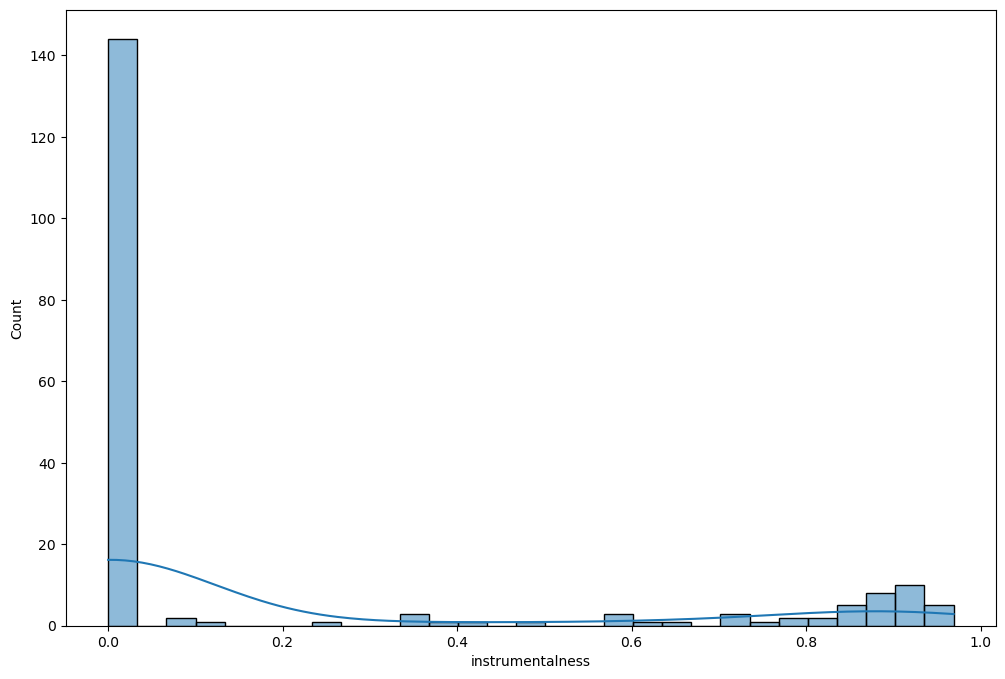

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(df.instrumentalness, kde=True)

<Axes: xlabel='liveness', ylabel='Count'>

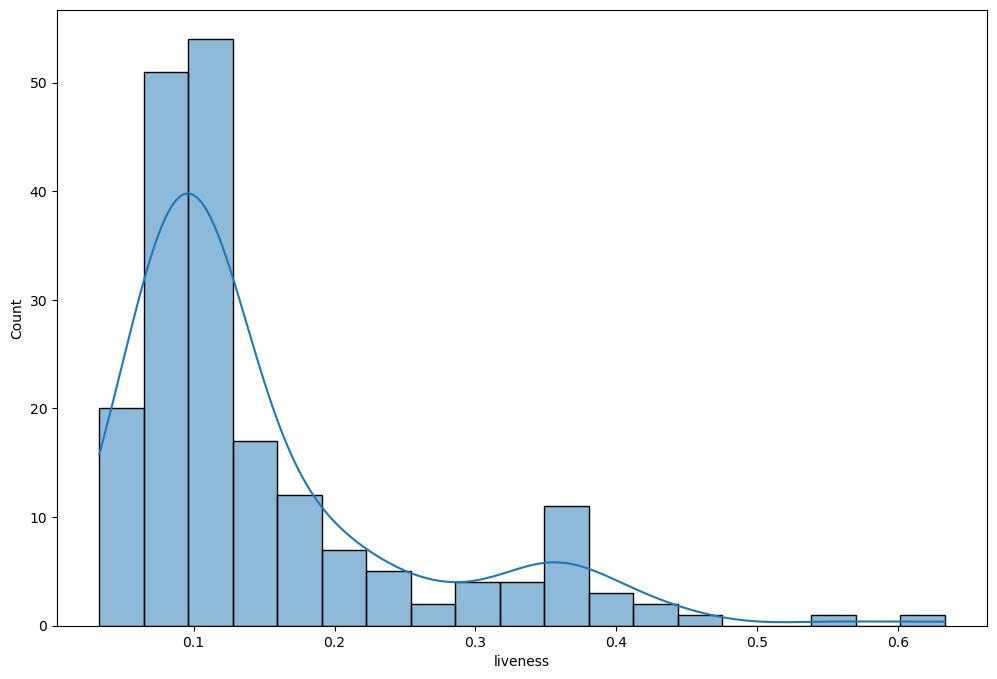

In [39]:
plt.figure(figsize=(12, 8))
sns.histplot(df.liveness, kde=True)

<Axes: xlabel='valence', ylabel='Count'>

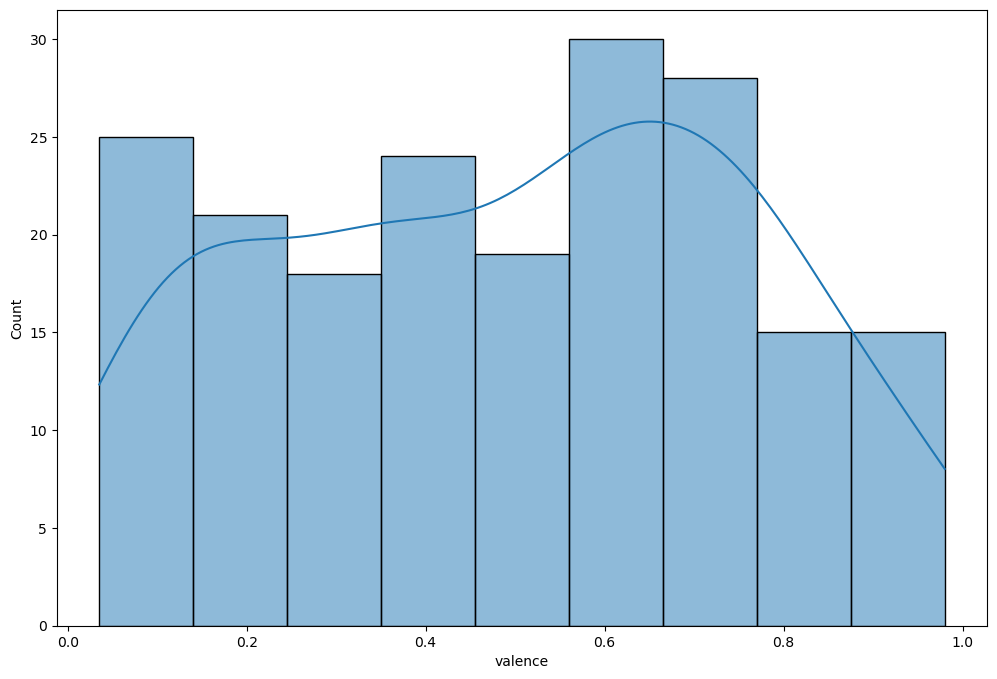

In [40]:
plt.figure(figsize=(12, 8))
sns.histplot(df.valence, kde=True)

<Axes: xlabel='tempo', ylabel='Count'>

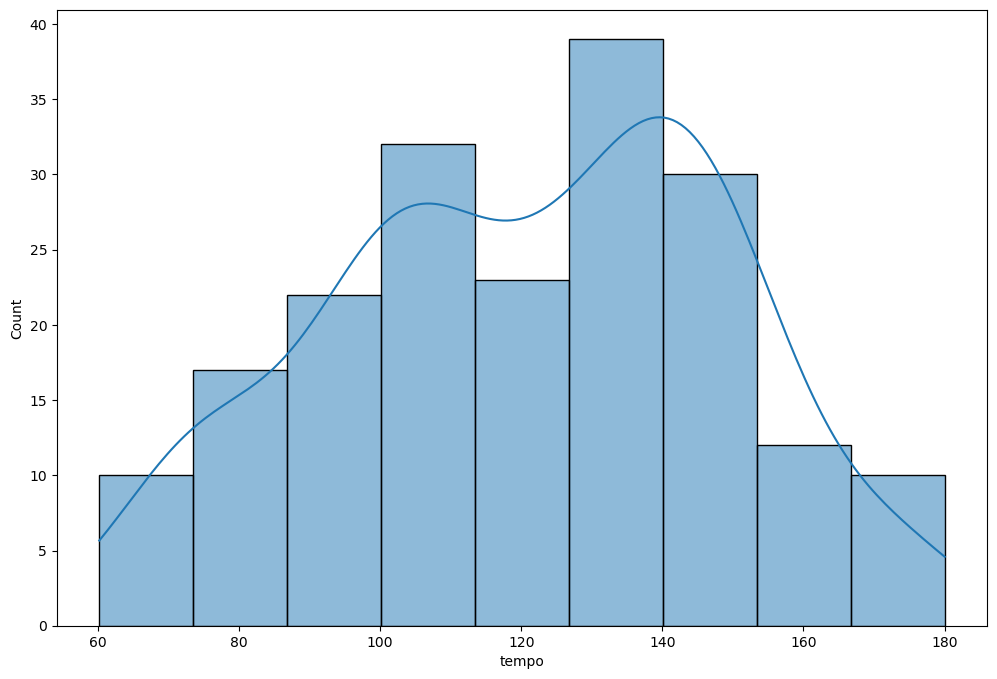

In [41]:
plt.figure(figsize=(12, 8))
sns.histplot(df.tempo, kde=True)

<Axes: xlabel='duration_ms', ylabel='Count'>

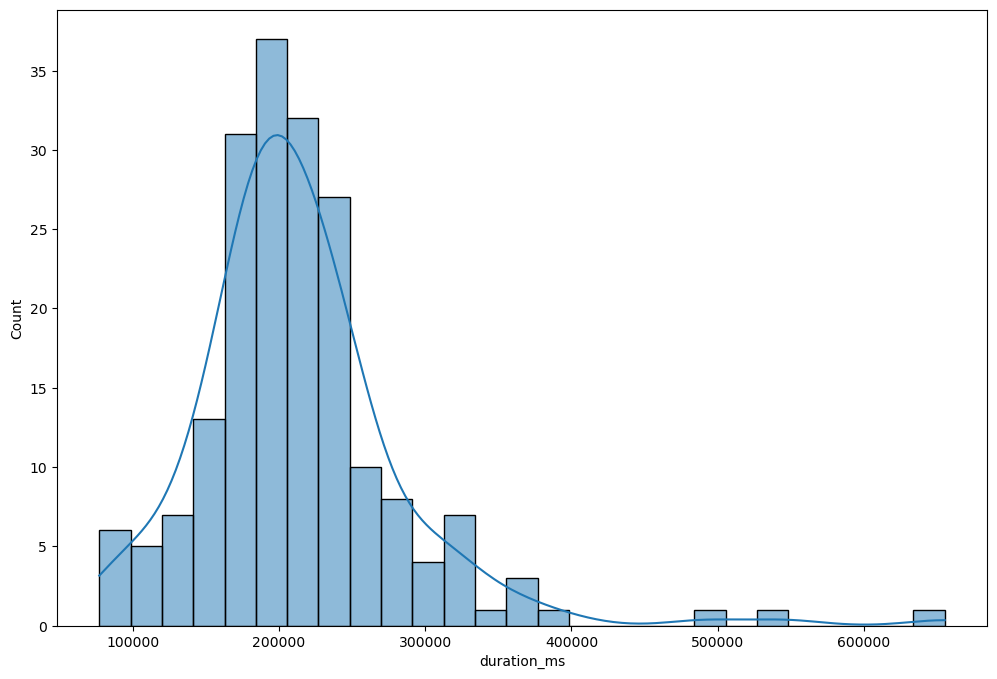

In [43]:
plt.figure(figsize=(12, 8))
sns.histplot(df.duration_ms, kde=True)

<Axes: xlabel='time_signature', ylabel='Count'>

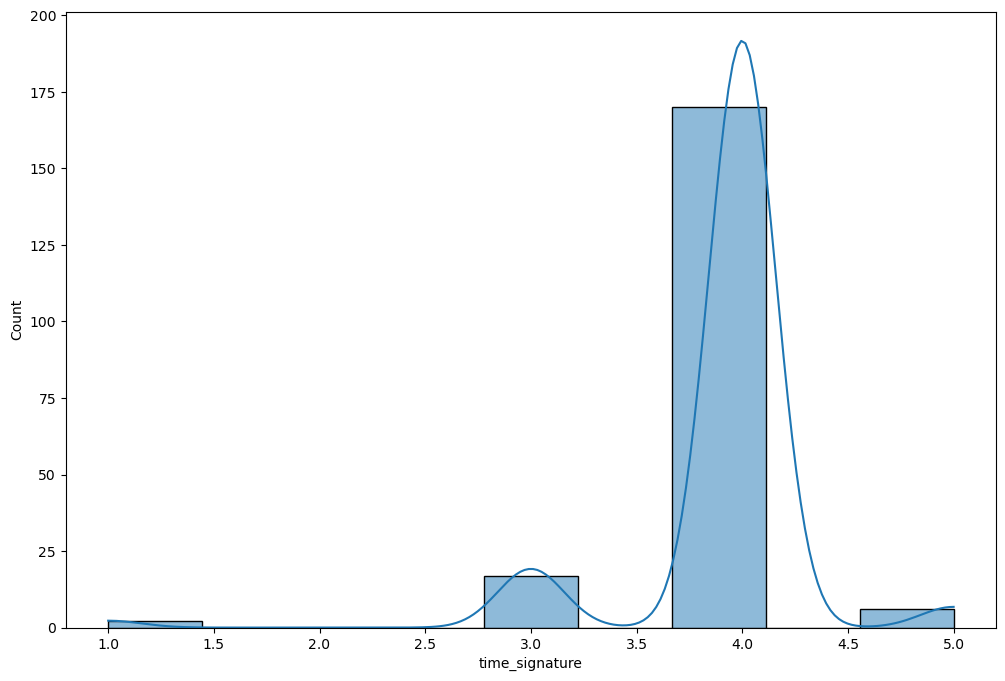

In [45]:
plt.figure(figsize=(12, 8))
sns.histplot(df.time_signature, kde=True)

<Axes: xlabel='liked', ylabel='Count'>

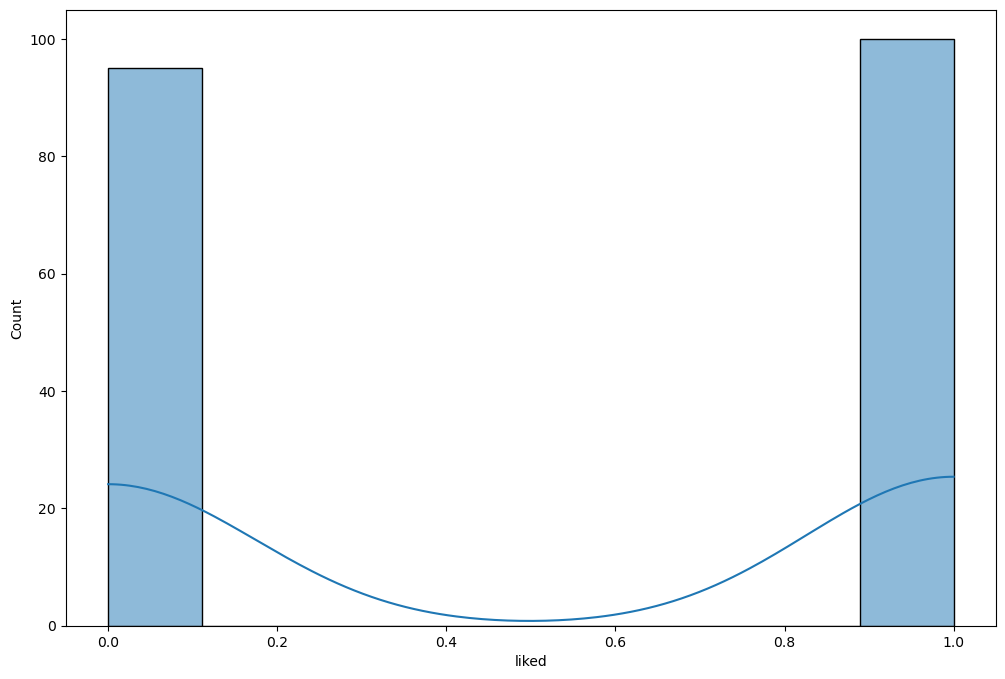

In [46]:
plt.figure(figsize=(12, 8))
sns.histplot(df.liked, kde=True)

<Figure size 1200x800 with 0 Axes>

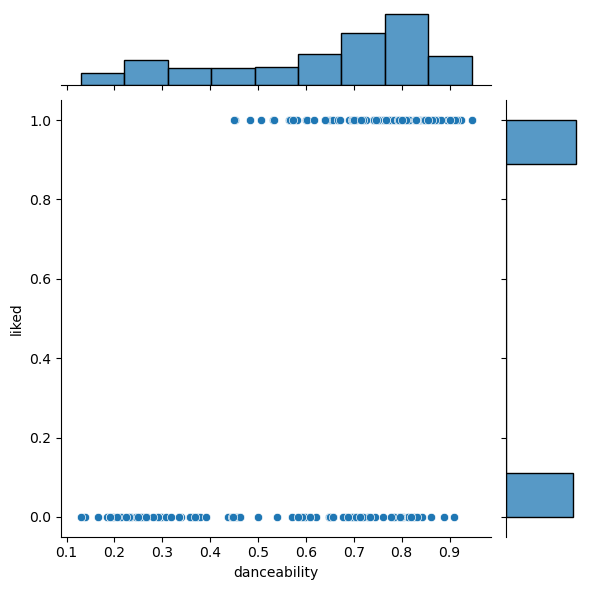

In [50]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.danceability, y = df.liked, data = df)
plt.show()

<Figure size 1200x800 with 0 Axes>

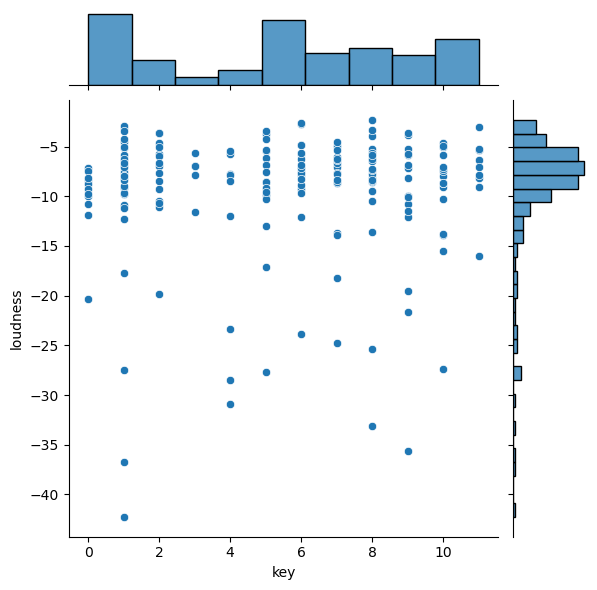

In [51]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.key, y = df.loudness, data = df)
plt.show()

<Figure size 1200x800 with 0 Axes>

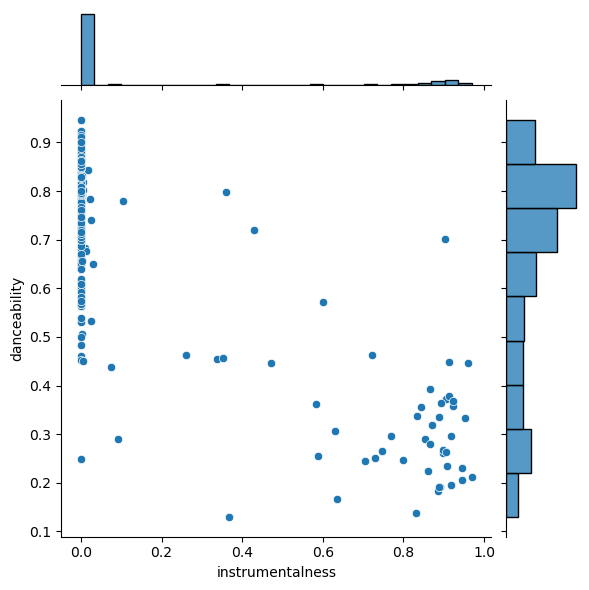

In [52]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.instrumentalness, y = df.danceability, data = df)
plt.show()

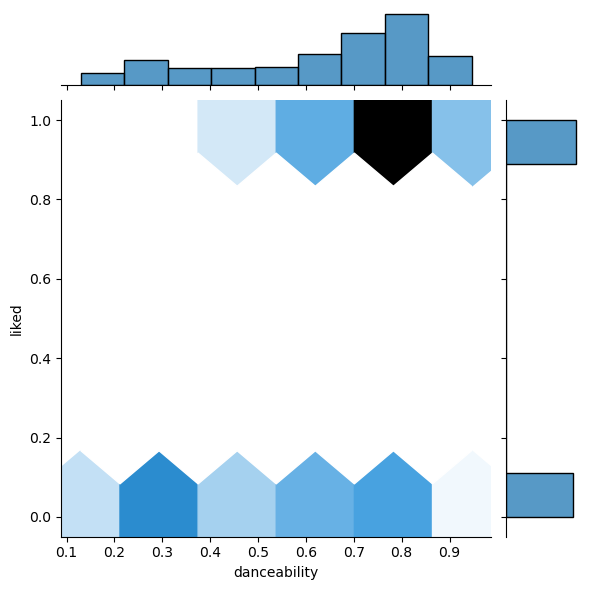

In [54]:
sns.jointplot(x = df.danceability, y = df.liked, data = df, kind = 'hex')
plt.show()

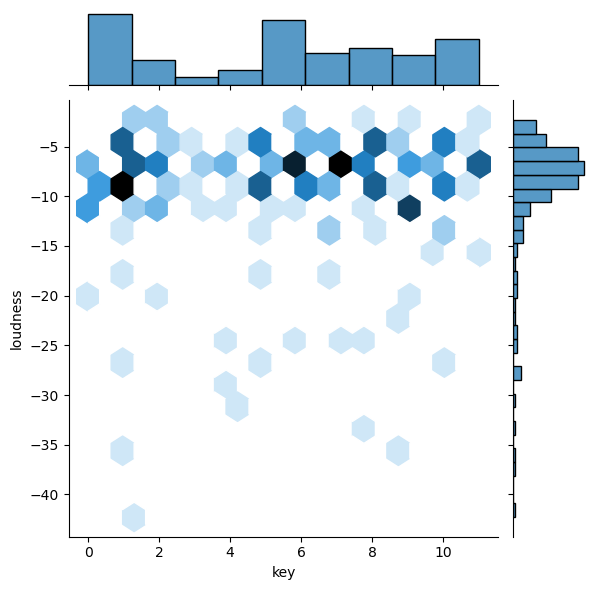

In [55]:
sns.jointplot(x = df.key, y = df.loudness, data = df, kind = 'hex')
plt.show()

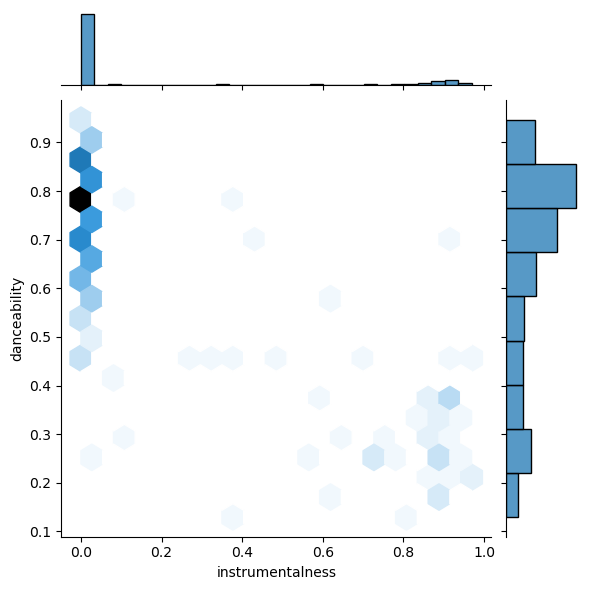

In [56]:
sns.jointplot(x = df.instrumentalness, y = df.danceability, data = df, kind = 'hex')
plt.show()

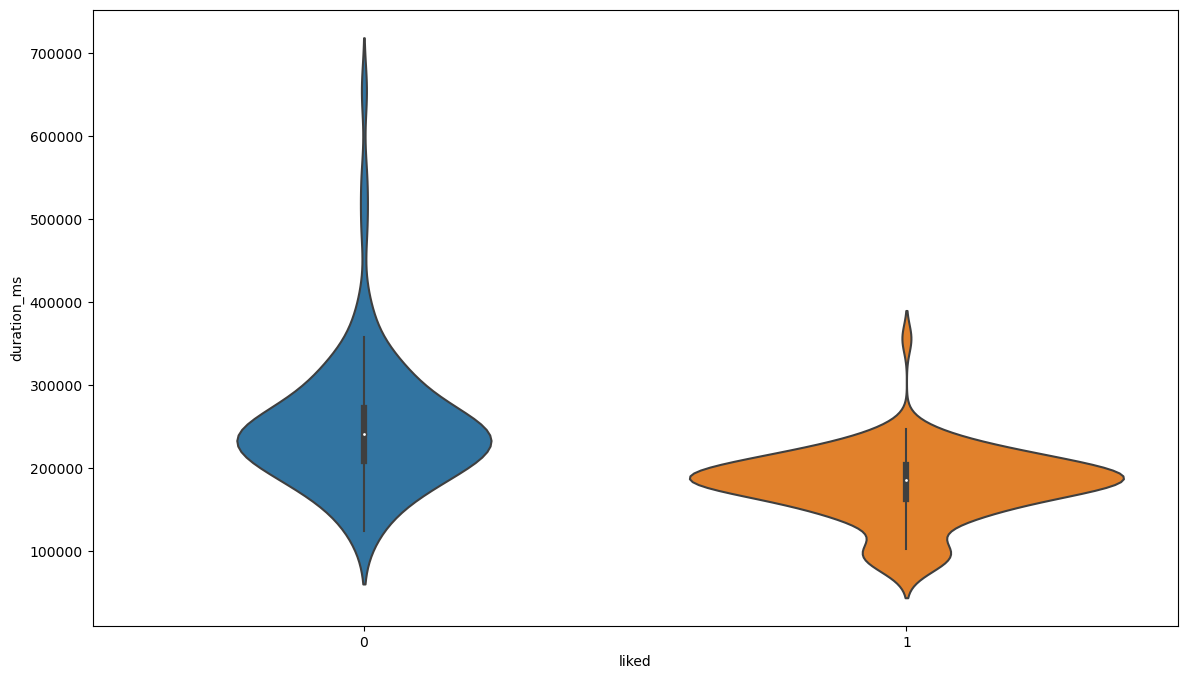

In [57]:
plt.figure(figsize=(14, 8))
sns.violinplot(x = "liked", y = "duration_ms", data = df)
plt.show()

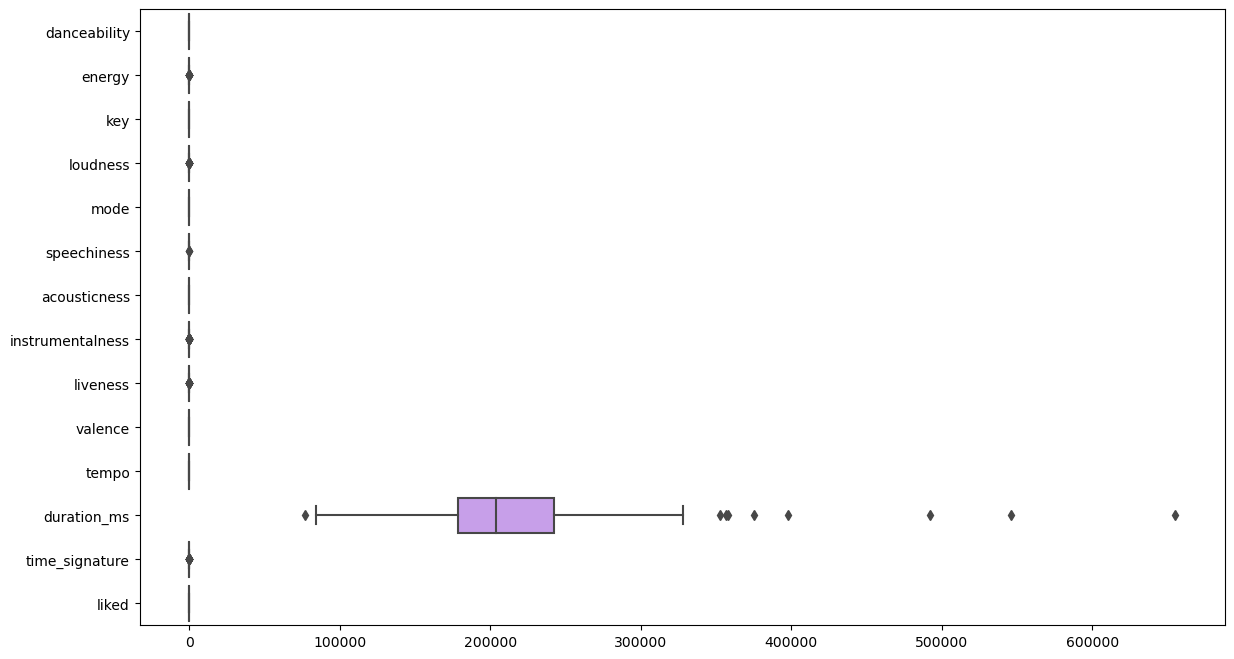

In [60]:
plt.figure(figsize=(14, 8))
sns.boxplot(data = df, orient = "h")
plt.show()

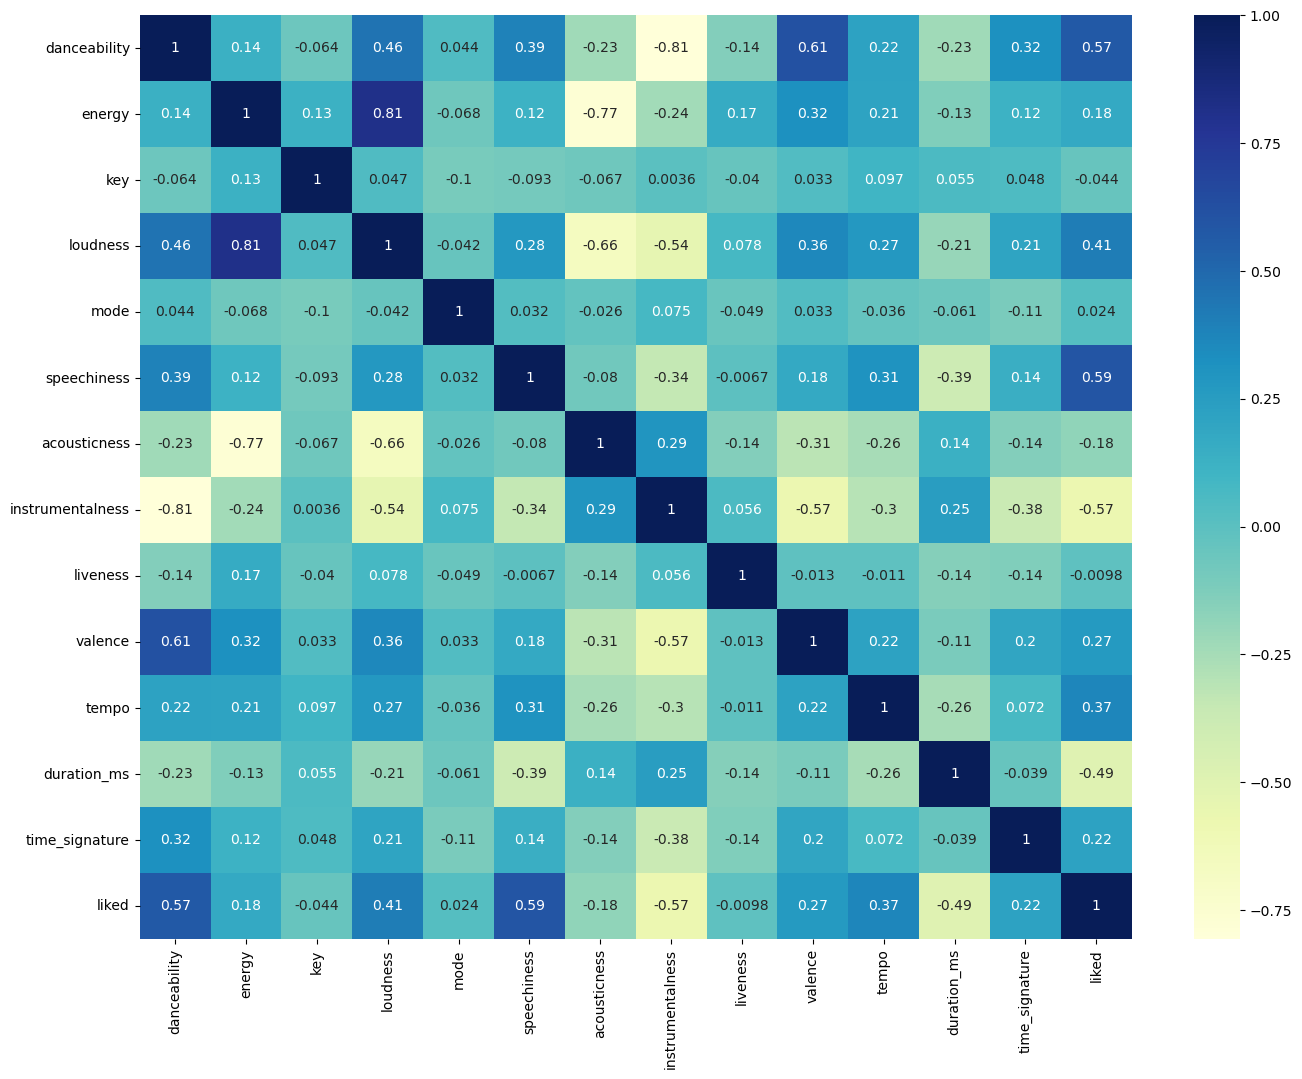

In [61]:
#drawing correlations between variables using a heatmap
plt.figure(figsize=(16,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Processing Data

In [100]:
# labels encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['tempo']= label_encoder.fit_transform(df['duration_ms'])
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence  tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280    176       304524               4   
1          0.000000    0.0912   0.5190    151       247178               4   
2          0.897000    0.1020   0.0382    173       286987               4   
3          0.000001    0.1230   0.5820    102       208920               4   
4          0.000000    0.0753   0.6470     52       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1  


In [101]:
maps = df["duration_ms"].value_counts()
df.drop(columns='duration_ms', inplace=True)
maps

146480    2
183667    2
180000    1
149422    1
126333    1
         ..
185107    1
179253    1
172520    1
106000    1
177213    1
Name: duration_ms, Length: 193, dtype: int64

In [90]:
df.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,liked
110,0.379,0.075,0,-20.328,1,0.0408,0.992000,0.913000,0.1060,0.0353,0,0
122,0.784,0.902,11,-5.308,0,0.0434,0.003080,0.000233,0.1300,0.2710,1,1
93,0.798,0.746,10,-8.639,1,0.0313,0.030400,0.361000,0.0703,0.9650,0,0
151,0.734,0.425,0,-9.773,1,0.0635,0.131000,0.000017,0.0726,0.2350,0,0
87,0.338,0.988,8,-7.290,0,0.0865,0.000083,0.833000,0.0377,0.4490,0,0
102,0.871,0.673,5,-5.363,0,0.3520,0.287000,0.000000,0.2190,0.6830,1,1
75,0.454,0.968,6,-6.289,1,0.0787,0.000017,0.338000,0.0472,0.5350,0,0
94,0.908,0.610,9,-5.735,1,0.2710,0.213000,0.000034,0.2410,0.4430,1,1
88,0.814,0.672,9,-12.068,1,0.0619,0.043500,0.000000,0.0610,0.9330,0,0
32,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091000,0.1020,0.2570,0,0


In [91]:
x = df.drop(columns=['danceability'])
y = df['danceability']

In [92]:
x

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,liked
0,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,0,0
1,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,1,1
2,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,0,0
3,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,1,1
4,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,1,1
...,...,...,...,...,...,...,...,...,...,...,...
190,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,0,0
191,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,0,0
192,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,0,0
193,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,1,1


# Feature Importance and Normalization

In [108]:
# get standard deviation for fields
x.std()

energy              0.260096
key                 3.415209
loudness            6.525086
mode                0.499802
speechiness         0.120414
acousticness        0.320782
instrumentalness    0.346226
liveness            0.105975
valence             0.267695
time_signature      0.501122
liked               0.501122
dtype: float64

In [109]:
#Applying StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)
print(x_std.std())

1.0


In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

print("X_train Shape -", x_train.shape)
print("X_test Shape -", x_test.shape)
print("Y_train Shape -", y_train.shape)
print("Y_test Shape -", y_test.shape)

X_train Shape - (136, 11)
X_test Shape - (59, 11)
Y_train Shape - (136,)
Y_test Shape - (59,)


In [118]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [112]:
model.add(Dense(38, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(22, activation='softmax'))

In [119]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                304       
                                                                 
 dense_1 (Dense)             (None, 32)                1248      
                                                                 
 dense_2 (Dense)             (None, 22)                726       
                                                                 
Total params: 2,278
Trainable params: 2,278
Non-trainable params: 0
_________________________________________________________________


In [120]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 96ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val

Epoch 56/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 57/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 58/100
4/4 [==============================] - 0s 8ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 59/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 60/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 61/100
4/4 [==============================] - 0s 14ms/step - loss: 8.4151 - accuracy: 0.0000e+00 - val_loss: 10.6347 - val_accuracy: 0.0000e+00
Epoch 62/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4151 - accuracy: 0.0000e+0

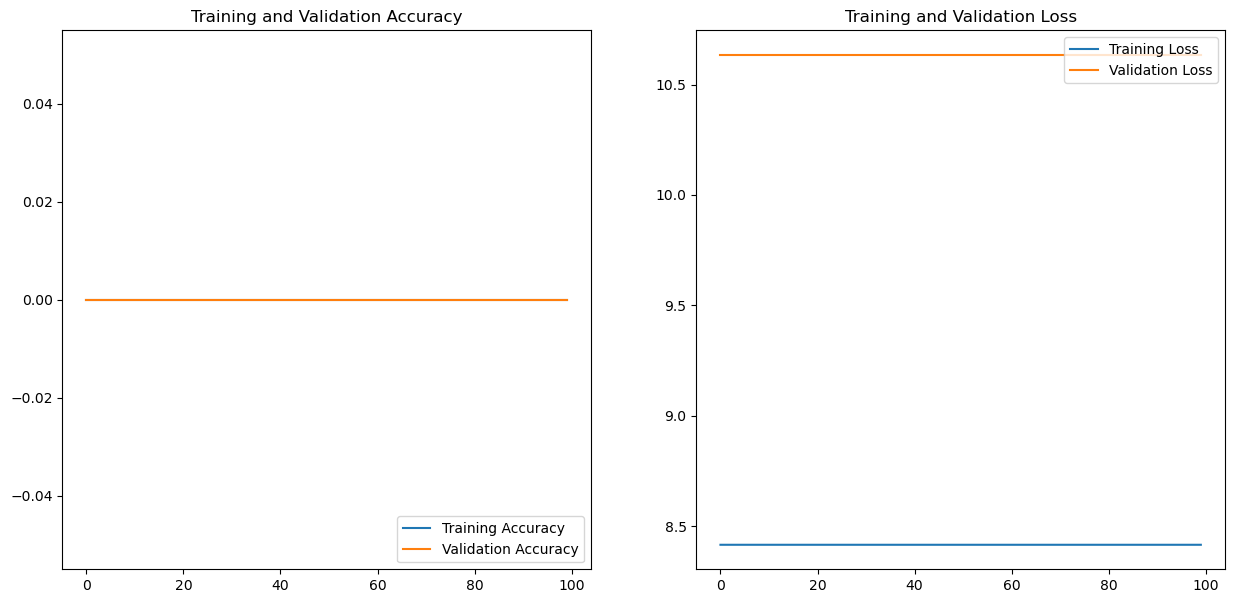

<Figure size 640x480 with 0 Axes>

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("mAccuracy.png")

In [122]:
scores = model.evaluate(x_test, y_test)


y_predict = model.predict(x_test)
y_predict[:2]

model.save('music_model.h5')

2/2 [==============================] - 0s 16ms/step


In [123]:
from tensorflow import keras
model = keras.models.load_model('music_model.h5')

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [126]:
y_pred = model.predict(x_test)
y_pred

2/2 [==============================] - 0s 3ms/step


array([[ 8.03955138e-01,  1.47533491e-01,  1.05920064e+00,
         9.25820112e-01, -9.39660311e-01,  2.96622932e-01,
        -5.56945801e-01,  2.43650532e+00,  9.33936119e-01,
        -1.02597833e+00, -1.02597833e+00],
       [ 1.31662142e+00, -1.32027411e+00,  6.67395234e-01,
         9.25820112e-01,  3.36587206e-02, -9.93327260e-01,
        -2.93444455e-01, -4.39491957e-01, -8.86235595e-01,
        -1.02597833e+00, -1.02597833e+00],
       [-9.07502055e-01,  1.47533491e-01,  2.62172744e-02,
        -1.08012342e+00, -7.11525679e-01,  5.93536854e-01,
        -4.85430747e-01, -4.20570940e-01, -6.09090090e-01,
         9.74679410e-01,  9.74679410e-01],
       [ 1.29349363e+00,  7.34656572e-01,  4.98534799e-01,
        -1.08012342e+00, -3.57667148e-01, -9.97224033e-01,
         2.00865388e+00,  8.75519931e-01, -6.12835348e-01,
        -1.02597833e+00, -1.02597833e+00],
       [ 1.27807510e+00,  7.34656572e-01,  9.52875376e-01,
         9.25820112e-01,  9.16223466e-01, -2.44072869e-01,
  

In [127]:
class_names = ['304524', '247178', '286987', '208920', '179413',
       '224029', '146053', '161800', '247460', '165363',
       '182427', '225000', '170520', '185667', '178013', '234267',
       '136901', '314367', '201384', '102353', '139240', '270000']

In [128]:
result = "The recommended duration_ms is {} with a {:.2f}% Confidence. ".format(class_names[np.argmax(y_predict[1:2])],
                                         100 * np.max(y_predict[1:2]))
print(result)

The recommended duration_ms is 304524 with a 131.66% Confidence. 
